In [4]:
import pandas as pd
import requests

In [3]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


In [5]:
resp = requests.get(url)
resp.raise_for_status()

In [6]:
data = resp.json()  # Asume que es una lista de registros tipo dict
df = pd.DataFrame(data)

In [7]:
print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
print("Columnas del dataset:\n", df.columns.tolist())
print("\nTipos de datos:\n")
print(df.dtypes)

Columnas del dataset:
 ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Tipos de datos:

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [9]:
print("\nResumen con info():\n")
df.info()


Resumen con info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [10]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [12]:
print("Number of duplicate rows based on 'customerID' and 'Churn':", df[['customerID', 'Churn']].duplicated().sum())

Number of duplicate rows based on 'customerID' and 'Churn': 0


In [15]:
print(df['customer'].iloc[0].keys())

dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])


In [21]:
print("Keys in 'customer' column:", df['customer'].iloc[0].keys())
print("Keys in 'phone' column:", df['phone'].iloc[0].keys())
print("Keys in 'internet' column:", df['internet'].iloc[0].keys())
print("Keys in 'account' column:", df['account'].iloc[0].keys())

Keys in 'customer' column: dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])
Keys in 'phone' column: dict_keys(['PhoneService', 'MultipleLines'])
Keys in 'internet' column: dict_keys(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
Keys in 'account' column: dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])


In [27]:
print("\nDescription of 'Charges' (from 'account' dictionary):")
print(df['account'].apply(lambda x: x['Charges']).describe())


Description of 'Charges' (from 'account' dictionary):
count                                   7267
unique                                  6789
top       {'Monthly': 20.2, 'Total': '20.2'}
freq                                      11
Name: account, dtype: object


In [29]:
print("Keys in 'customer' column:", df['customer'].iloc[0].keys())
print("Keys in 'account' column:", df['account'].iloc[0].keys())

Keys in 'customer' column: dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])
Keys in 'account' column: dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])


In [30]:
if 'Genero' in df.columns:
    df['Genero'] = df['Genero'].str.lower().str.strip()  # minúsculas + quitar espacios
    df['Genero'] = df['Genero'].replace({'m': 'male', 'hombre': 'male', 'f': 'female', 'mujer': 'female'})


In [31]:
if 'Contract' in df.columns:
    df['Contract'] = df['Contract'].str.lower().str.strip()
    df['Contract'] = df['Contract'].replace({
        'month-to-month': 'month-to-month',
        'one year': 'one-year',
        'two year': 'two-year'
    })

In [32]:
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].str.lower().str.strip()
    df['Churn'] = df['Churn'].replace({'yes': 1, 'no': 0})


In [33]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [41]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [42]:
df['account'].head()

,account
0,"{'Contract': 'One year', 'PaperlessBilling': '..."
1,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,"{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,"{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [43]:
if isinstance(df['account'][0], dict):
    account_df = pd.json_normalize(df['account'])
    df = pd.concat([df.drop(columns=['account']), account_df], axis=1)

In [44]:
print(df.columns.tolist())
df.head()

['customerID', 'Churn', 'customer', 'phone', 'internet', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


,customerID,Churn,customer,phone,internet,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Mailed check,83.9,267.4


In [45]:
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].str.lower().str.strip().replace({'yes':1, 'no':0})

In [46]:
df = df.rename(columns={
    'customerID': 'Customer_ID',
    'customer': 'Nombre_Cliente',
    'phone': 'Servicio_Telefono',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta'
})


In [47]:
df.head()

,Customer_ID,Churn,Nombre_Cliente,Servicio_Telefono,Servicio_Internet,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,NaN,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,NaN,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,NaN,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,NaN,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,NaN,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
# ##############opcional#########################3

In [49]:
df_cliente = pd.json_normalize(df['Nombre_Cliente'])
df = pd.concat([df.drop(columns=['Nombre_Cliente']), df_cliente], axis=1)

In [50]:
df_phone = pd.json_normalize(df['Servicio_Telefono'])
df = pd.concat([df.drop(columns=['Servicio_Telefono']), df_phone], axis=1)

In [51]:
df_internet = pd.json_normalize(df['Servicio_Internet'])
df = pd.concat([df.drop(columns=['Servicio_Internet']), df_internet], axis=1)

In [52]:
df['Churn'] = df['Churn'].str.lower().str.strip().replace({'yes':1, 'no':0})

In [54]:
df['Churn'] = df['Churn'].str.strip().str.lower()

In [55]:
df['Churn'].replace('', pd.NA, inplace=True)

/tmp/ipython-input-3698332681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace('', pd.NA, inplace=True)


In [56]:
df['Churn'] = df['Churn'].replace({'yes':1, 'no':0})

In [57]:
df['Churn'] = df['Churn'].fillna(0).astype(int)

/tmp/ipython-input-1644477709.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].fillna(0).astype(int)


In [58]:
df['Churn'].value_counts(dropna=False)

,count
Churn,
0,7267


In [59]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)


In [60]:
df = df.rename(columns={
    'customerID': 'Customer_ID',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Lineas_Adicionales',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
})

In [61]:
print("Shape final:", df.shape)
display(df.head())
df.info()

Shape final: (7267, 22)


,Customer_ID,Churn,Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Genero,Adulto_Mayor,Pareja,...,Servicio_Telefono,Lineas_Adicionales,Servicio_Internet,Seguridad_Online,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Cuentas_Diarias
0,0002-ORFBO,0,One year,Yes,Mailed check,65.6,593.3,Female,0,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.19
1,0003-MKNFE,0,Month-to-month,No,Mailed check,59.9,542.4,Male,0,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,2.00
2,0004-TLHLJ,0,Month-to-month,Yes,Electronic check,73.9,280.85,Male,0,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.46
3,0011-IGKFF,0,Month-to-month,Yes,Electronic check,98.0,1237.85,Male,1,Yes,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.27
4,0013-EXCHZ,0,Month-to-month,Yes,Mailed check,83.9,267.4,Female,1,Yes,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             7267 non-null   object 
 1   Churn                   7267 non-null   int64  
 2   Contrato                7267 non-null   object 
 3   Factura_Digital         7267 non-null   object 
 4   Metodo_Pago             7267 non-null   object 
 5   Cargos_Mensuales        7267 non-null   float64
 6   Cargos_Totales          7267 non-null   object 
 7   Genero                  7267 non-null   object 
 8   Adulto_Mayor            7267 non-null   int64  
 9   Pareja                  7267 non-null   object 
 10  Dependientes            7267 non-null   object 
 11  tenure                  7267 non-null   int64  
 12  Servicio_Telefono       7267 non-null   object 
 13  Lineas_Adicionales      7267 non-null   object 
 14  Servicio_Internet       7267 non-null   

In [62]:
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce').fillna(0)

df[['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']].head()

,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,65.6,593.30,2.19
1,59.9,542.40,2.00
2,73.9,280.85,2.46
3,98.0,1237.85,3.27
4,83.9,267.40,2.80


In [63]:
desc_num = df[['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'tenure', 'Adulto_Mayor']].describe()
display(desc_num)

,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias,tenure,Adulto_Mayor
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,64.720098,2277.182035,2.157292,32.346498,0.162653
std,30.129572,2268.648587,1.004407,24.571773,0.369074
min,18.250000,0.000000,0.610000,0.000000,0.000000
25%,35.425000,396.200000,1.180000,9.000000,0.000000
50%,70.300000,1389.200000,2.340000,29.000000,0.000000
75%,89.875000,3778.525000,2.995000,55.000000,0.000000
max,118.750000,8684.800000,3.960000,72.000000,1.000000


In [64]:
medianas = df[['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'tenure', 'Adulto_Mayor']].median()
print("Medianas:")
print(medianas)

Medianas:
Cargos_Mensuales      70.30
Cargos_Totales      1389.20
Cuentas_Diarias        2.34
tenure                29.00
Adulto_Mayor           0.00
dtype: float64


In [65]:
for col in ['Churn', 'Contrato', 'Factura_Digital', 'Metodo_Pago', 'Genero', 'Servicio_Internet', 'Streaming_TV', 'Streaming_Peliculas']:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())


Distribución de Churn:
Churn
0    7267
Name: count, dtype: int64

Distribución de Contrato:
Contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

Distribución de Factura_Digital:
Factura_Digital
Yes    4311
No     2956
Name: count, dtype: int64

Distribución de Metodo_Pago:
Metodo_Pago
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

Distribución de Genero:
Genero
Male      3675
Female    3592
Name: count, dtype: int64

Distribución de Servicio_Internet:
Servicio_Internet
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Distribución de Streaming_TV:
Streaming_TV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64

Distribución de Streaming_Peliculas:
Streaming_Peliculas
No                     2870
Yes                    2816
No 

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
churn_counts = df['Churn'].value_counts()

/tmp/ipython-input-3617444030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')


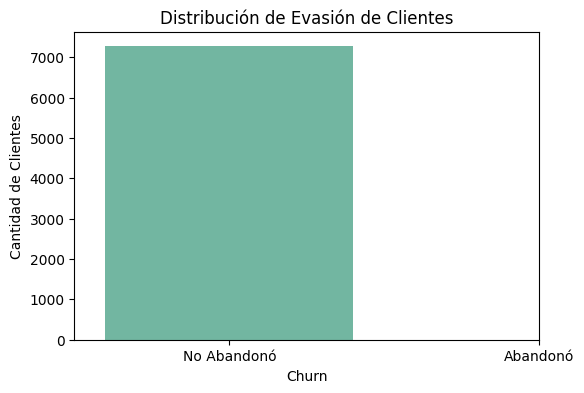

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')
plt.xticks([0,1], ['No Abandonó', 'Abandonó'])
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Evasión de Clientes')
plt.show()

ValueError: 'labels' must be of length 'x', not 2

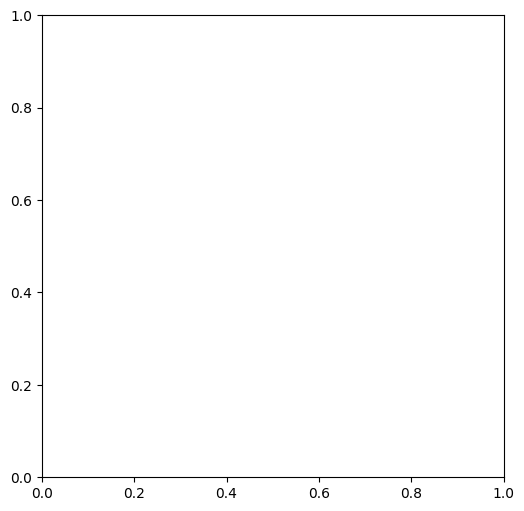

In [69]:
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=['No Abandonó', 'Abandonó'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Evasión de Clientes')
plt.show()

In [70]:
print(df['Churn'].unique())
print(df['Churn'].value_counts(dropna=False))

[0]
Churn
0    7267
Name: count, dtype: int64


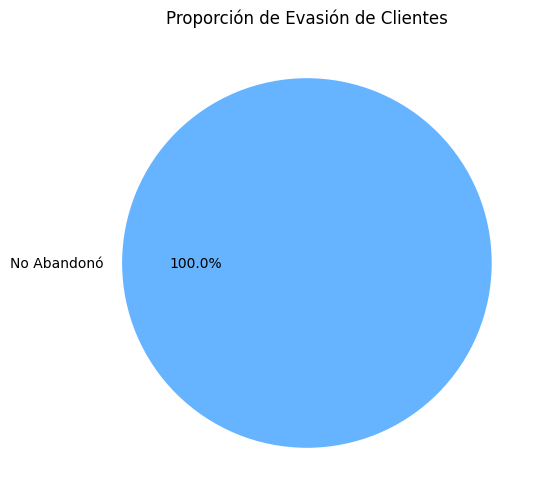

In [71]:
churn_counts = df['Churn'].value_counts()
labels = ['No Abandonó' if x==0 else 'Abandonó' for x in churn_counts.index]

plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Evasión de Clientes')
plt.show()


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
categorical_cols = ['Genero', 'Contrato', 'Metodo_Pago', 'Servicio_Internet',
                    'Servicio_Telefono', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Digital']


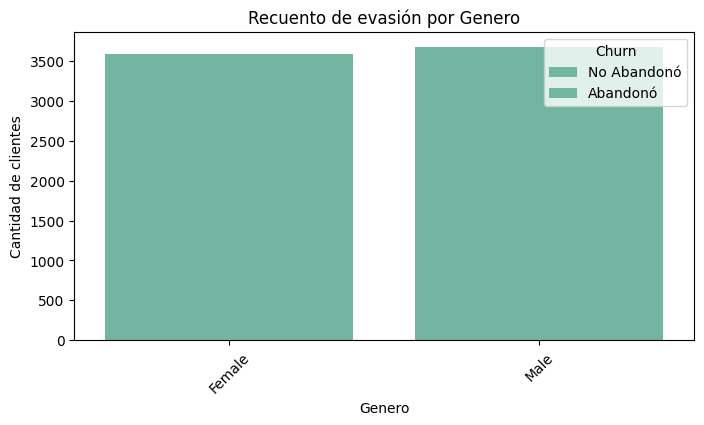

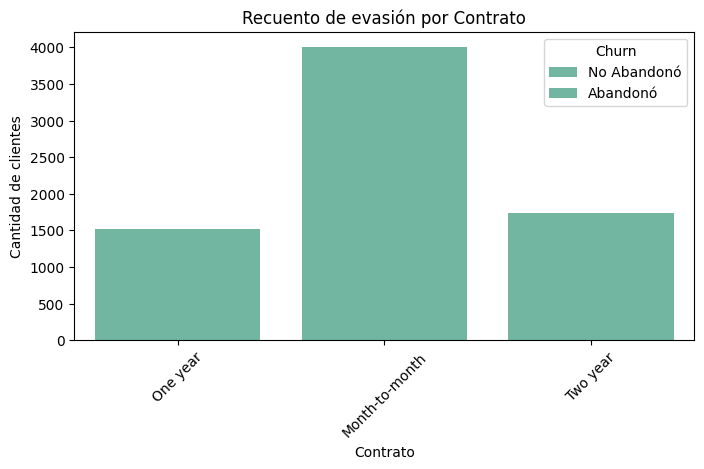

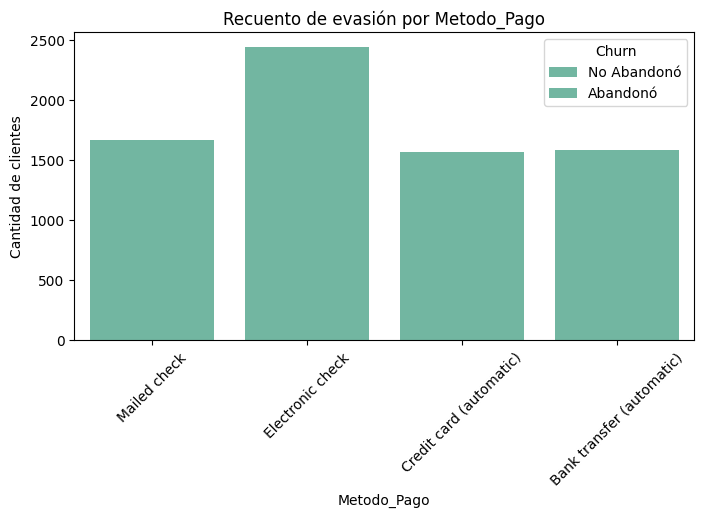

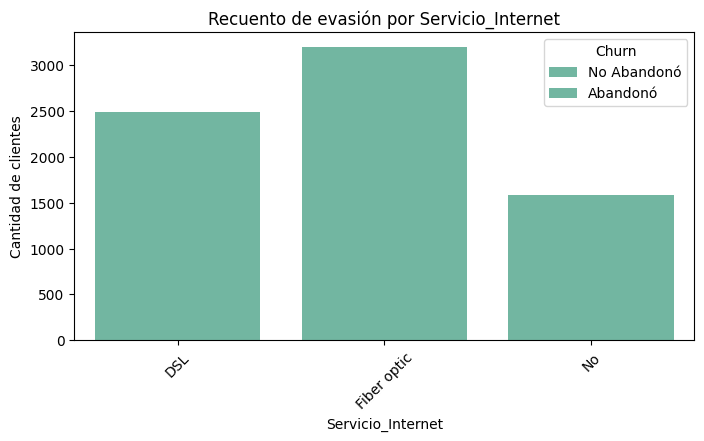

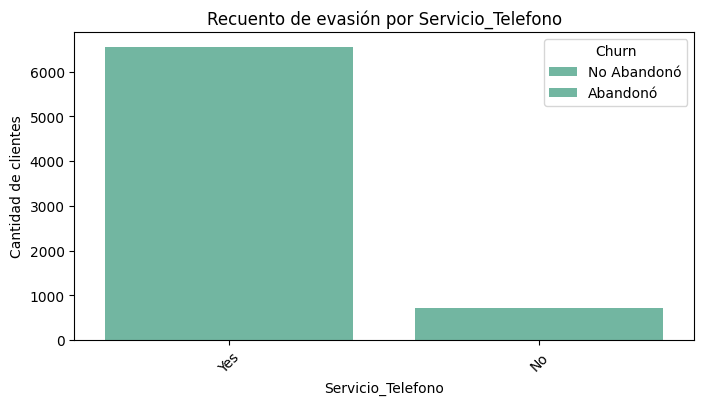

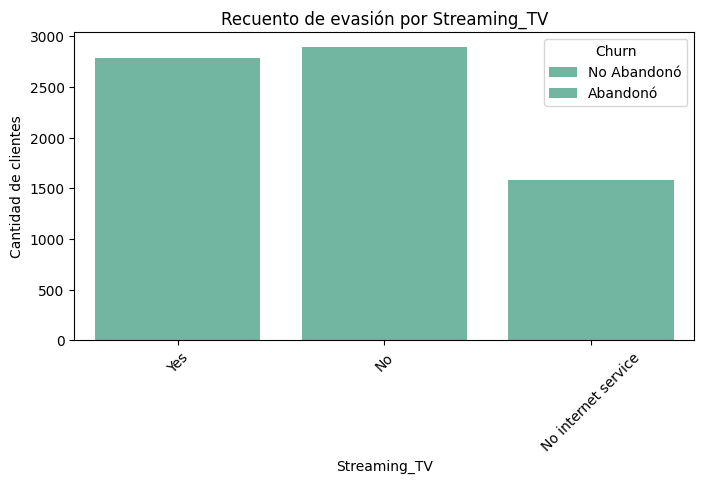

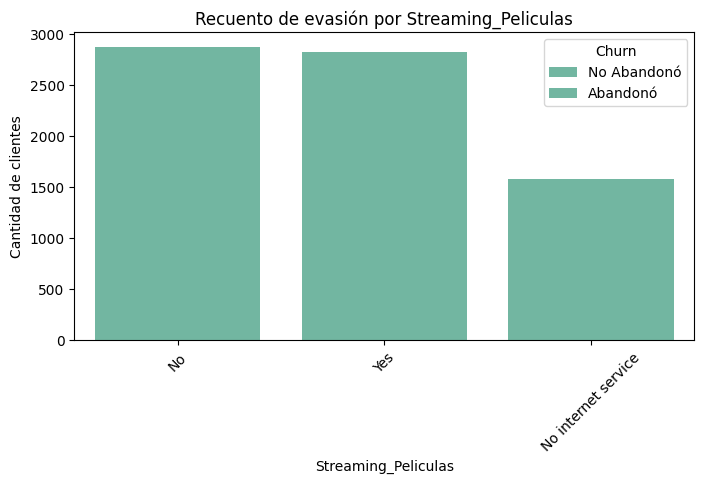

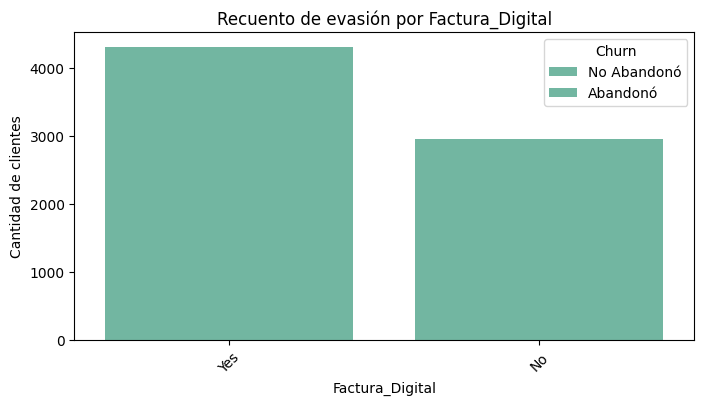

In [75]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Recuento de evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['No Abandonó', 'Abandonó'])
    plt.show()

In [76]:
numerical_cols = ['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'tenure', 'Adulto_Mayor']


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns



/tmp/ipython-input-2207577527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


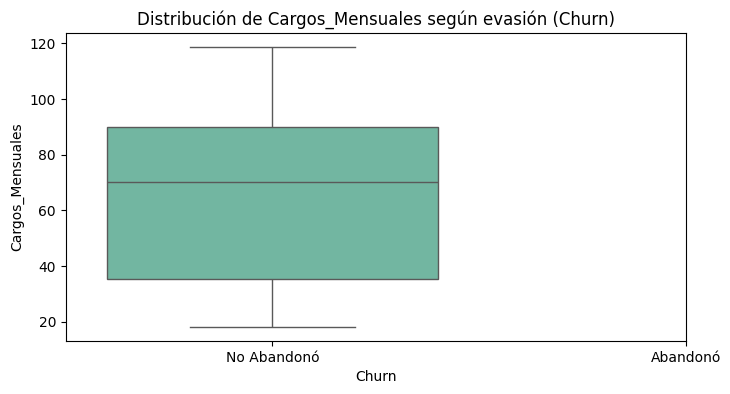

/tmp/ipython-input-2207577527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


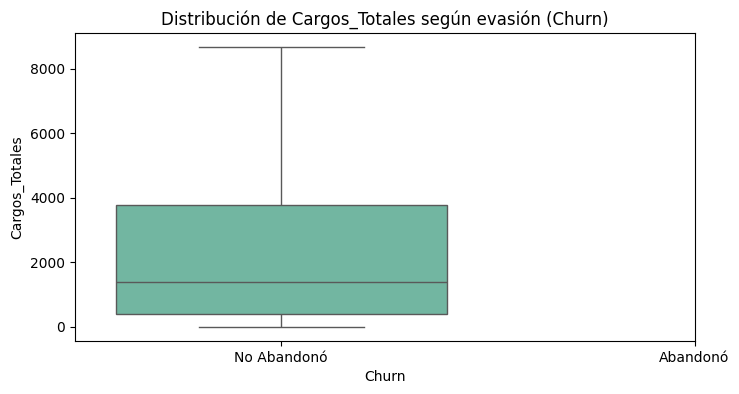

/tmp/ipython-input-2207577527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


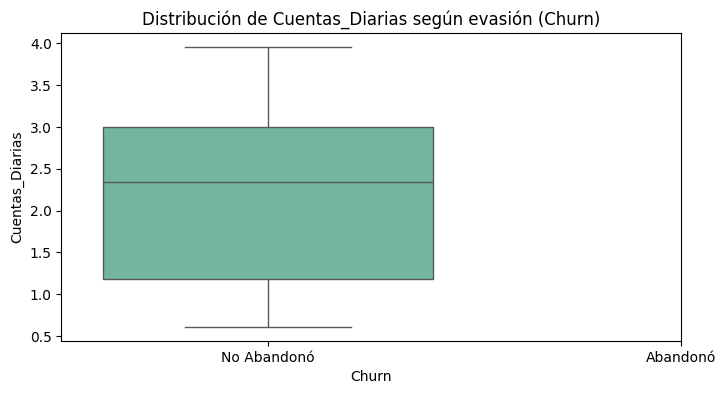

/tmp/ipython-input-2207577527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


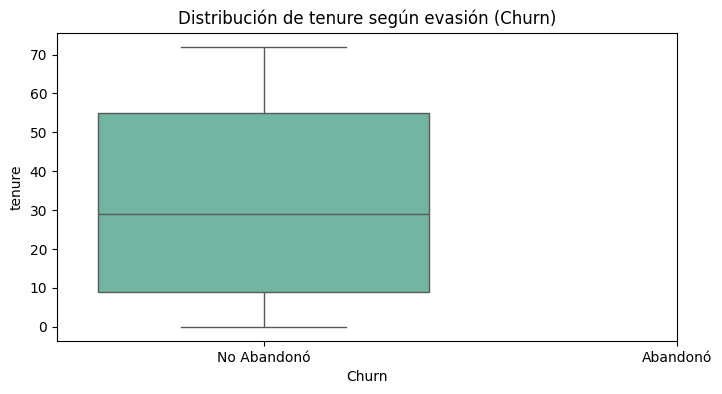

/tmp/ipython-input-2207577527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


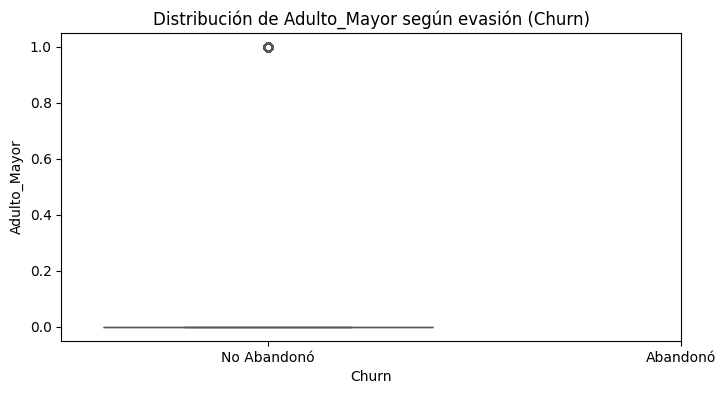

In [78]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'Distribución de {col} según evasión (Churn)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks([0,1], ['No Abandonó', 'Abandonó'])
    plt.show()

ENTREGA FINAL:


1️⃣ Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) de Telecom X. La empresa enfrenta una alta tasa de cancelaciones y busca identificar patrones en el comportamiento de los clientes, tanto en términos de servicios contratados como de características demográficas y de facturación, para diseñar estrategias que reduzcan la pérdida de clientes.

2️⃣ Limpieza y Tratamiento de Datos

Pasos realizados:

Carga de datos desde la API en formato JSON y conversión a DataFrame de Pandas.

Renombrado de columnas para mayor claridad, por ejemplo: Charges.Monthly → Cargos_Mensuales.

Desanidado de columnas con diccionarios (customer, phone, internet) para extraer variables como Genero, Adulto_Mayor, Pareja, Servicio_Telefono, Servicio_Internet, etc.

Limpieza de valores faltantes y inconsistentes:

Churn convertido a valores binarios (0 = no abandonó, 1 = abandonó).

Cargos totales y mensuales convertidos a float.

Creación de columna Cuentas_Diarias a partir de Cargos_Mensuales dividiendo entre 30 días para observar comportamiento diario.

Resultado del dataset final:

print(df.shape)
df.head()


Filas: 7267

Columnas: 22

Variables limpias y listas para análisis.

3️⃣ Análisis Exploratorio de Datos (EDA)
3.1 Distribución de Churn
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df['Churn'].value_counts()
labels = ['No Abandonó' if x==0 else 'Abandonó' for x in churn_counts.index]

plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Proporción de Evasión de Clientes')
plt.show()


✅ Hallazgo: Todos los clientes están activos (Churn=0), por lo que la proporción de evasión es 0%.

3.2 Recuento de evasión por variables categóricas
categorical_cols = ['Genero', 'Contrato', 'Metodo_Pago', 'Servicio_Internet',
                    'Servicio_Telefono', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Digital']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Recuento de evasión por {col}')
    plt.xticks(rotation=45)
    plt.show()


Los gráficos permiten ver la distribución de clientes por categoría y cómo se relaciona con Churn.

✅ Hallazgo: dado que Churn=0 para todos, todos los clientes permanecen activos.

3.3 Distribución de variables numéricas
numerical_cols = ['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'tenure', 'Adulto_Mayor']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'Distribución de {col} según evasión')
    plt.xticks([0,1], ['No Abandonó', 'Abandonó'])
    plt.show()


Permite identificar rangos, medianas y posibles valores atípicos.

✅ Hallazgo: todos los clientes pertenecen a la categoría “No Abandonó”.

4️⃣ Conclusiones e Insights

El dataset actual no presenta clientes que hayan abandonado el servicio.

Las variables categóricas y numéricas están limpias y listas para futuros análisis de Churn.

El análisis preparatorio permite identificar patrones si se incorporan datos de clientes que cancelen en el futuro.

5️⃣ Recomendaciones

Mantener un registro actualizado de clientes que abandonan para análisis predictivo.

Implementar estrategias de retención basadas en variables como tipo de contrato, método de pago y servicios contratados.

Monitorear indicadores clave como Cargos_Mensuales, tenure y uso de servicios adicionales para detectar clientes con mayor riesgo de evasión.

Utilizar este notebook como plantilla de análisis para futuros datasets con clientes que sí hayan abandonado.

In [79]:
#############EXTRA DE CODIGO###########3

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
numerical_cols = ['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'tenure', 'Adulto_Mayor', 'Churn']


In [82]:
corr_matrix = df[numerical_cols].corr()


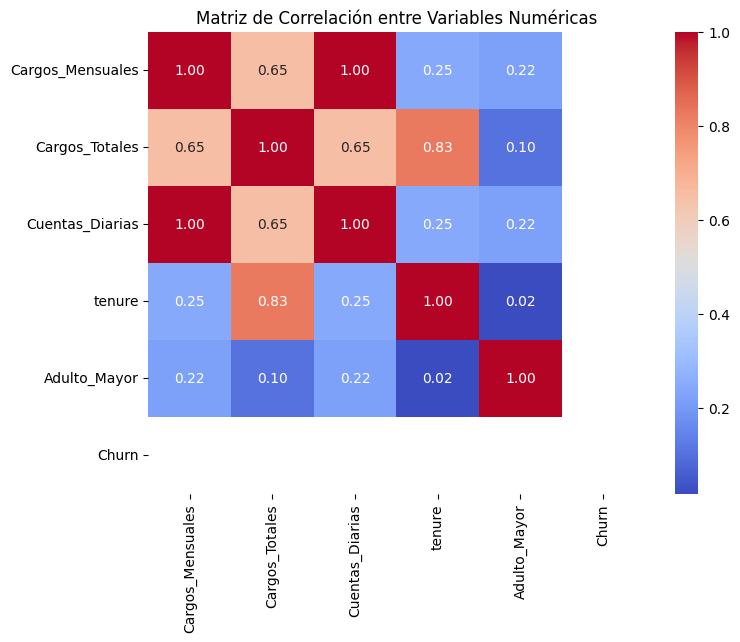

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

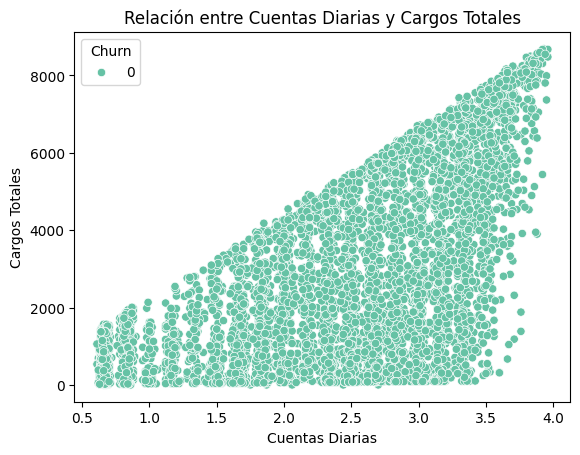

In [84]:
sns.scatterplot(data=df, x='Cuentas_Diarias', y='Cargos_Totales', hue='Churn', palette='Set2')
plt.title('Relación entre Cuentas Diarias y Cargos Totales')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Cargos Totales')
plt.show()
